<a href="https://colab.research.google.com/github/OlegDenisenko/Data-analyst-Step1k/blob/main/lesson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [4]:
df = pd.read_csv('/content/sample_data/lesson_3_data__1_.csv', encoding='windows-1251')

In [5]:
df.head(2)

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,id_fam,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761.0,11000076.0,21895.0,1.010706e+11,1.010706e+09,10107064.0,10107064.0,10107.0,101.0,1.0,0.68,1.0,21895.0,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761.0,11000076.0,21816.0,1.010706e+11,1.010706e+09,10107064.0,10107064.0,10107.0,101.0,1.0,0.38,1.0,21816.0,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta


In [6]:
user_df = df[['tc', 'art_sp']]

In [7]:
user_df

,tc,art_sp
0,110000761.0,MARAVILLA 500 G Store_Brand
1,110000761.0,FIDEO CABELLIN 500 G Store_Brand
2,28491841.0,SPAGUETTI Nє 5 500 G Brand_1
3,95931501.0,FIDEO FIDEUБ 500 Brand_7
4,93265591.0,MACARRONES GRATINAR 5 Brand_2
...,...,...
12469,94641851.0,SPAGHETTI 500 G Store_Brand
12470,14390431.0,PLUMAS 6 500 G Brand_4
12471,94622221.0,TALLARINES 500 G Brand_3
12472,14390431.0,PIСONES 500 G Brand_4


In [8]:
user_df = user_df.rename(columns={'tc': 'user_id', 'art_sp': 'brand_info'})

In [9]:
user_df.head(3)

,user_id,brand_info
0,110000761.0,MARAVILLA 500 G Store_Brand
1,110000761.0,FIDEO CABELLIN 500 G Store_Brand
2,28491841.0,SPAGUETTI Nє 5 500 G Brand_1


In [23]:
def split_brand(brand_name_data):
    return brand_name_data.split(' ')[-1]

In [11]:
brnad_name = 'MARAVILLA 500 G Store_Brand'

In [12]:
brnad_name.split(' ')[-1]

'Store_Brand'

In [33]:
user_df.brand_info

0        MARAVILLA        500 G Store_Brand
1        FIDEO CABELLIN   500 G Store_Brand
2              SPAGUETTI Nє 5 500 G Brand_1
3             FIDEO FIDEUБ      500 Brand_7
4            MACARRONES  GRATINAR 5 Brand_2
                        ...                
12469    SPAGHETTI        500 G Store_Brand
12470        PLUMAS 6         500 G Brand_4
12471        TALLARINES       500 G Brand_3
12472        PIСONES          500 G Brand_4
12473                                   NaN
Name: brand_info, Length: 12474, dtype: object

In [36]:
user_df['brand_name'] = user_df.brand_info.astype(str).apply(split_brand)

In [20]:
# user_df['brand_name'] = user_df.brand_info.apply(lambda x: x.split(' ')[-1])
# используем lambda функцию, чтобы разрезать строку по пробелу и взять последний элемент

In [37]:
user_df.head()

,user_id,brand_info,brand_name
0,110000761.0,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761.0,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841.0,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501.0,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591.0,MACARRONES GRATINAR 5 Brand_2,Brand_2


Сколько пользователи делают покупок всего, Отбираем только тех, у которых больше 5 покупок

In [38]:
users_purchases = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': 'count'}) \
    .rename(columns={'brand_name': 'purchases'}) \
    .query('purchases >= 5')

Считаем число уникальных брендов

In [39]:
users_unique_brands = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': pd.Series.nunique}) \
    .rename(columns={'brand_name': 'unique_brands'})

Для каждого пользователя считаем, сколько покупок приходится на его любимый бренд

In [40]:
lovely_brand_purchases_df = user_df.groupby(['user_id', 'brand_name'], as_index=False) \
    .agg({'brand_info': 'count'}) \
    .sort_values(['user_id', 'brand_info'], ascending=[False, False]) \
    .groupby('user_id') \
    .head(1) \
    .rename(columns={'brand_name': 'lovely_brand','brand_info': 'lovely_brand_purchases'})

In [41]:
loyalty_df = users_purchases \
    .merge(users_unique_brands, on='user_id') \
    .merge(lovely_brand_purchases_df, on='user_id')

In [42]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,4241.0,5,2,Brand_4,3
1,40911.0,27,5,Brand_4,19
2,63001.0,6,2,Brand_4,5
3,63441.0,6,2,Store_Brand,4
4,64121.0,5,3,Brand_3,2


In [43]:
loyal_users = loyalty_df[loyalty_df.unique_brands == 1]

Показатель лояльности каждого клиента

In [44]:
loyalty_df['loyalty_score'] = loyalty_df.lovely_brand_purchases / loyalty_df.purchases

In [45]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases,loyalty_score
0,4241.0,5,2,Brand_4,3,0.600000
1,40911.0,27,5,Brand_4,19,0.703704
2,63001.0,6,2,Brand_4,5,0.833333
3,63441.0,6,2,Store_Brand,4,0.666667
4,64121.0,5,3,Brand_3,2,0.400000


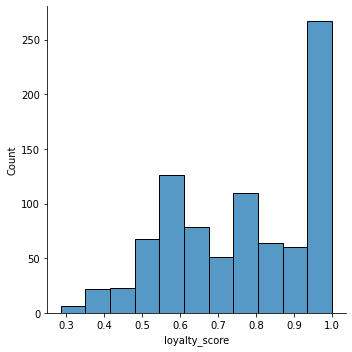

In [49]:
ax = sns.displot(loyalty_df.loyalty_score, kde=False)

In [50]:
brands_loyalty = loyalty_df.groupby('lovely_brand', as_index=False) \
    .agg({'loyalty_score': 'median', 'user_id': 'count'}) 

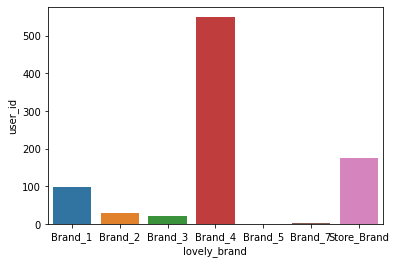

In [51]:
ax = sns.barplot(x="lovely_brand", y="user_id", data=brands_loyalty)